In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re

In [2]:
data = pd.read_csv('mx.csv')

In [3]:
data = data.drop(['ex_showroom_price','seller_type'], axis = 1)

In [4]:
data['brand'] = data['name'].apply(lambda col: re.findall('\w+\s', col, re.I)[0])

In [5]:
#let's create a function so we don't have to do it multiple times 

def create_dummies(df, column_name):
    
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column_name, axis = 1)
    
    return df

In [6]:
data = create_dummies(data,'owner')
data = create_dummies(data, 'brand')
data = create_dummies(data, 'year')

In [7]:
data.drop('name', axis = 1, inplace = True)

In [8]:
X = data.drop('selling_price', axis = 1)
y = data['selling_price']

### <font color = gray>Linear Regression<font>

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 1)

In [11]:
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

In [12]:
compare = pd.DataFrame({'pred':preds,
              'real':y_test})

compare = compare.sort_values(by = 'real')
compare = compare.reset_index(drop = True)
compare.pred = compare.pred.astype('int64')

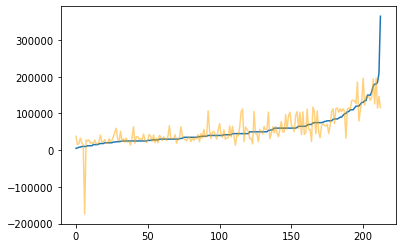

In [13]:
plt.plot(compare['real'])
plt.plot(compare['pred'], color = 'orange', alpha = .5)

### <font color = gray>Elastic Net<font>

In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
els_net = ElasticNet()

els_net.fit(X_train, y_train)
preds_els = els_net.predict(X_test)

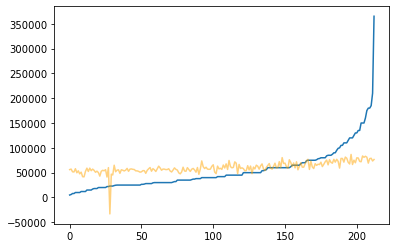

In [16]:
compare = pd.DataFrame({'pred':preds_els,
              'real':y_test})

compare = compare.sort_values(by = 'real')
compare = compare.reset_index(drop = True)
compare.pred = compare.pred.astype('int64')

plt.plot(compare['real'])
plt.plot(compare['pred'], color = 'orange', alpha = .5)

### <font color = gray>Ridge Regression<font>

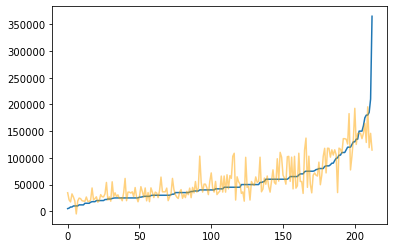

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(solver='cholesky')

ridge.fit(X_train, y_train)

pred_ridge = ridge.predict(X_test)

compare = pd.DataFrame({'pred':pred_ridge,
                        'real':y_test})

compare = compare.sort_values(by = 'real')
compare = compare.reset_index(drop = True)
compare.pred = compare.pred.astype('int64')

plt.plot(compare['real'])
plt.plot(compare['pred'], color = 'orange', alpha = .5)

### <font color = gray>Decision Tree Regressor<font>

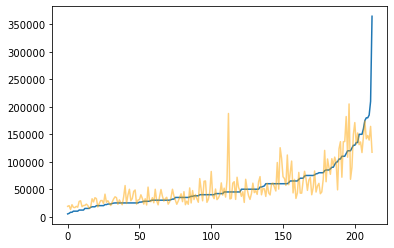

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

pred_forest = forest.predict(X_test)


compare = pd.DataFrame({'pred':pred_forest,
              'real':y_test})

compare = compare.sort_values(by = 'real')
compare = compare.reset_index(drop = True)
compare.pred = compare.pred.astype('int64')

plt.plot(compare['real'])
plt.plot(compare['pred'], color = 'orange', alpha = .5)

### <font color = gray>Forest Optimized with GridSearch (Best so far)<font>

In [19]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

hyperparameters = {'max_depth':range(2,20),
                   'min_samples_split':range(2,20)
                  }

grid = GridSearchCV(forest, param_grid = hyperparameters, cv = 10)

grid.fit(X_train, y_train) #notice that it's being cross-validated on the training set

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 20),
                         'min_samples_split': range(2, 20)})

In [20]:
best_params = grid.best_params_
best_score = grid.best_score_

print(f'best params are {best_params}\nbest score is {best_score}')

best params are {'max_depth': 13, 'min_samples_split': 19}
best score is 0.5726239389464627


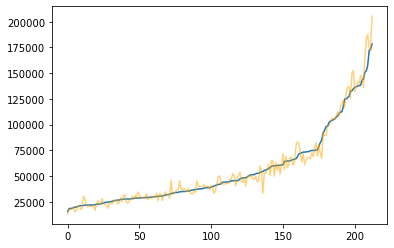

In [21]:
forest2 = RandomForestRegressor(max_depth = 17, min_samples_split = 10)

forest2.fit(X_train, y_train)

pred_forest2 = forest2.predict(X_test)

compare = pd.DataFrame({'pred':pred_forest,
                        'real':pred_forest2})

compare = compare.sort_values(by='real')
compare = compare.reset_index(drop=True)
compare.pred = compare.pred.astype('int64')

plt.plot(compare['real'])
plt.plot(compare['pred'], color = 'orange', alpha = .5)

In [22]:
# what are the most important features per the random forest?
for name, score in zip(X_train.columns, forest2.feature_importances_):
    print(name, round(score,4))

km_driven 0.266
owner_1st owner 0.0012
owner_2nd owner 0.001
owner_3rd owner 0.0002
owner_4th owner 0.004
brand_Activa  0.0006
brand_Aprilia  0.0
brand_BMW  0.0119
brand_Bajaj  0.0059
brand_Benelli  0.0009
brand_Davidson  0.1775
brand_Hero  0.0036
brand_Honda  0.0033
brand_Hyosung  0.0027
brand_Jawa  0.0057
brand_KTM  0.0523
brand_Kawasaki  0.0885
brand_Mahindra  0.0018
brand_Royal  0.1992
brand_Suzuki  0.0489
brand_TVS  0.0026
brand_UM  0.0067
brand_Vespa  0.0
brand_Yamaha  0.0062
brand_Yo  0.0001
year_1988 0.0
year_1991 0.0001
year_1993 0.0
year_1995 0.0003
year_1997 0.0
year_1998 0.0002
year_1999 0.0
year_2000 0.0
year_2001 0.0
year_2002 0.0
year_2003 0.0
year_2004 0.0
year_2005 0.0007
year_2006 0.0002
year_2007 0.0004
year_2008 0.0007
year_2009 0.0002
year_2010 0.0011
year_2011 0.0009
year_2012 0.0014
year_2013 0.0017
year_2014 0.0033
year_2015 0.0043
year_2016 0.0078
year_2017 0.018
year_2018 0.0284
year_2019 0.0388
year_2020 0.0008


In [23]:
# does this mean that a Royal Enfield is more expensive that a Harley?
# It's not; it might just be random error

round(data.loc[data['brand_Royal '] == 1, 'selling_price'].mean()), data.loc[data['brand_Davidson '] == 1, 'selling_price'].mean() 

(128550, 540000.0)